# Problem Statement

The objective is to use the employee's data to know the factors affecting salaries of an employee. And build a model that can predict the salaries varying with respect to considerable factors and interpret the results to find the factors which influnce the score.Data has 5000 rows and 20 features . Data contains object,integet, float type data types where the file in csv format.

There are freshers and upto 6 years of experience employees in the data.



The data includes the Salaries of employees , which makes this a supervised regression machine learning task:

Supervised: we have access to both the features and the target and our goal is to train a model that can learn a mapping between the two
Regression: The Salary is target variable which is dependent.
All other variables are Independent variables.


Approach:


Data exploration and data visualization for exploring each variable w.r.t salaries for both categorical and numerical variables to know the importance of the each variable.

Cleaning data like handling missing values,outliers, data types etc.

With below variables we can know if Gender ,Age,Base pay or any of the variable is effecting salary in a positive or a negative way with various techniques like correlation, t-test, Multicollinearity. 

And then bring all the variables to equal scale using feature scaling. Then split the data into train and test. Where train is to train the model and test is to test the model.

Build a regression model which is best suitable for our data after analyzing data.

Then use a evaluation metric for regression model adjusted R square which will evaluate our model accuracy and importance of variables.


In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing csv file
df= pd.read_csv('D:\DATA SCIENCE\Odin schools\Capstone\\New_data_Set.csv')

# Data Exploration

In [3]:
#head of data gives first 5 rows
df.head()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1,High School or less


In [4]:
#last rows of data gives last five rows
df.tail()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
4995,Female,0,No,Yes,Month-to-month,No,No,72,180696.80,72278.720,9034.840,629.511067,3927000,NaN,293.838840,310.955001,117.80,,72,PG
4996,Male,0,No,Yes,Month-to-month,Yes,No,73,185685.90,74274.360,9284.295,627.841071,6031900,NaN,301.311314,309.610028,118.60,,72,PG
4997,Male,0,No,Yes,Month-to-month,Yes,No,74,192636.80,77054.720,9631.840,625.860033,7949400,NaN,306.040009,303.483494,118.60,,72,PG
4998,Male,1,No,Yes,Month-to-month,Yes,Yes,74,195970.70,78388.280,9798.535,629.510005,3908400,NaN,308.579987,312.432438,118.65,,72,PG
4999,Male,0,Yes,Yes,Two year,Yes,No,88,199970.74,79988.296,9998.537,627.839984,6003300,NaN,312.307316,311.081089,118.75,,72,PG


We can see from head and tail of data that our data is loaded as expected and with a proper column names and values.

In [5]:
#data and each column information like data types and rows.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        4977 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  3524 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     4992 non-null   o

In [6]:
df.shape

(5000, 20)

Data has 5000 rows and 20 features . Data contains object,integet, float type data types. Business is categorical variable in binary, represented as integer. Total sales is a continuos data where it is represented as object. 

# Missing values

In [7]:
#missing values in data
df.isnull().sum()

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay            23
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1476
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales          8
Months               0
Education            0
dtype: int64

Data contains missing values in Base_pay,openingbalance,Total_Sales.

In [8]:
#percentage of missing values in each column
df.isna().sum()/len(df)*100 

Gender             0.00
Business           0.00
Dependancies       0.00
Calls              0.00
Type               0.00
Billing            0.00
Rating             0.00
Age                0.00
Salary             0.00
Base_pay           0.46
Bonus              0.00
Unit_Price         0.00
Volume             0.00
openingbalance    29.52
closingbalance     0.00
low                0.00
Unit_Sales         0.00
Total_Sales        0.16
Months             0.00
Education          0.00
dtype: float64

Base_pay and Total_Sales has very low missing values and can be treated. But opening balance has very high missing data and since the data we have is small dropping could be better way of opening balance.

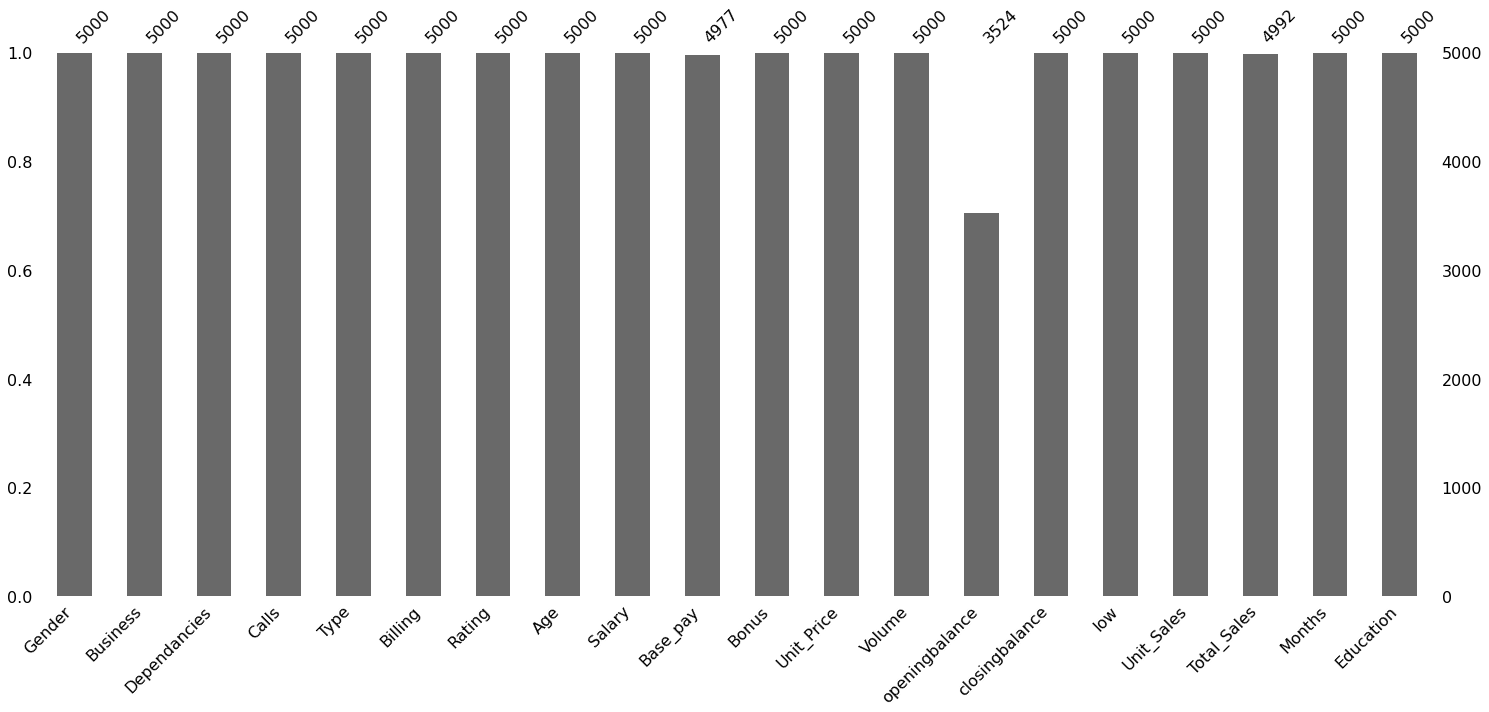

In [9]:
import missingno as msno # importing missingno from msno to visualize missing values.

msno.bar(df)

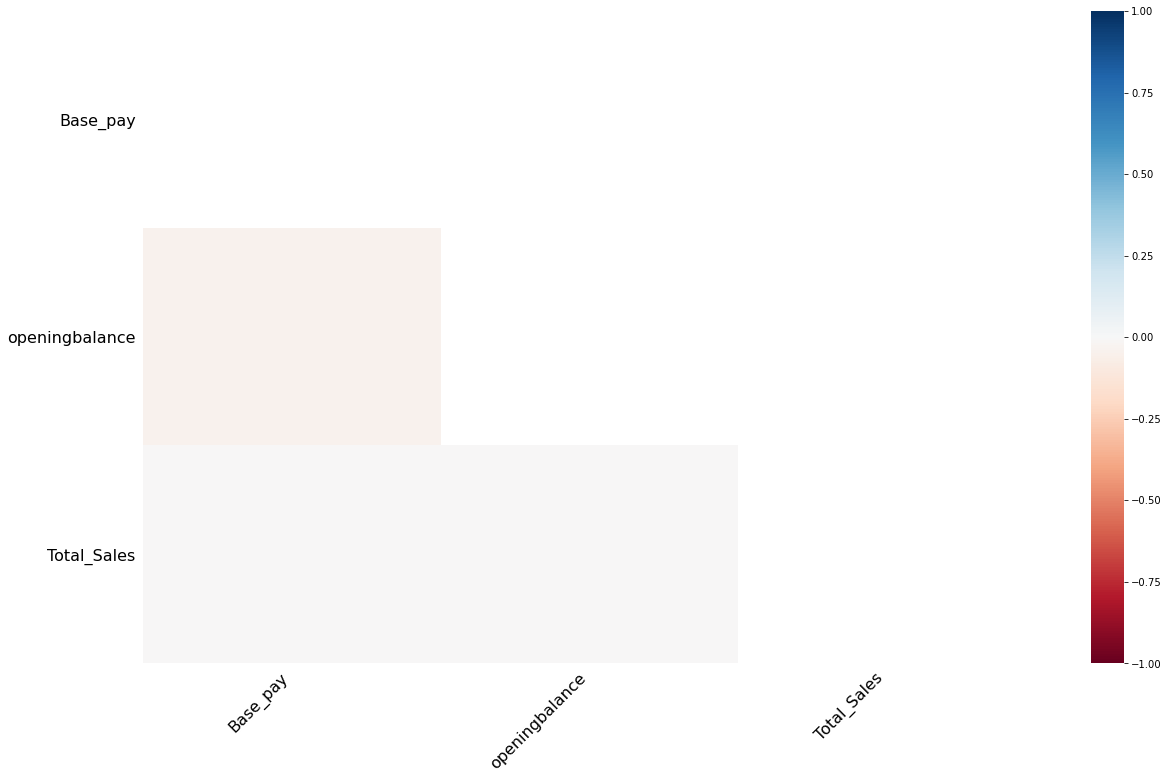

In [10]:
msno.heatmap(df)

The heatmap is used to identify correlations of the nullity between each of the different columns.But as we can see values are close to 0 we can conclude that missing values in one variable does not depends on other variables.

In [11]:
#statistical description of the data
df.describe()

,Business,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Months
count,5000.000000,5000.000000,5000.000000,4977.000000,5000.000000,5000.000000,5.000000e+03,3524.000000,5000.000000,5000.000000,5000.00000,5000.00000
mean,0.160000,51.865000,99821.928553,40046.187707,4991.096428,51.258522,6.761260e+06,43.922020,43.577828,43.034129,64.84151,32.18480
std,0.366643,8.560691,25376.961744,10135.686075,1268.848087,52.244022,1.620476e+07,38.361497,37.148512,36.760641,30.13968,24.63673
min,0.000000,18.000000,5089.000000,2035.600000,254.450000,1.440000,0.000000e+00,3.680000,3.680000,3.650000,18.25000,0.00000
25%,0.000000,47.000000,83890.338980,33720.552420,4194.516950,25.727500,1.283850e+06,22.098750,21.990000,21.718750,35.50000,8.00000
50%,0.000000,52.000000,100579.378500,40282.016040,5028.968925,39.205000,2.870600e+06,33.119999,33.340000,32.880001,70.50000,28.00000
75%,0.000000,57.000000,116912.092475,46792.232410,5845.604624,58.715000,6.247100e+06,51.421839,51.117500,50.415000,89.95000,55.00000
max,1.000000,88.000000,199970.740000,79988.296000,9998.537000,629.511067,3.208684e+08,313.903904,313.688694,312.432438,118.75000,72.00000


Comparing to mean of most of columns max value is very high. So there could be outliers in the data. Also we can observe Opening balance and closing balance has equal values as min max and mean, almost equal standard deviation. 

In [12]:
#unique values in each column
df.nunique()

Gender               2
Business             2
Dependancies         2
Calls                2
Type                 3
Billing              2
Rating               2
Age                 65
Salary            5000
Base_pay          4883
Bonus             5000
Unit_Price        3836
Volume            4831
openingbalance    2986
closingbalance    4011
low               4014
Unit_Sales        1434
Total_Sales       4706
Months              73
Education            4
dtype: int64

In [13]:
#Experience of employees
df['Months'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72], dtype=int64)

There are freshers and upto 6 years of experience employees in the data

In [14]:
df['Gender'].value_counts()

Male      2528
Female    2472
Name: Gender, dtype: int64

The data contains male employees slightly higher than Female employees

Text(0, 0.5, 'Count')

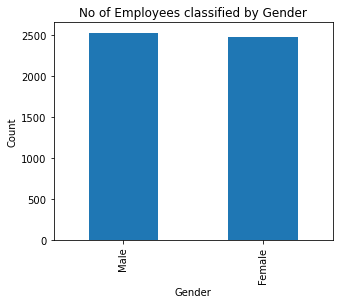

In [15]:
#bar plot on Gender
df['Gender'].value_counts().plot(kind='bar',
                                    figsize=(5,4),
                                    title="No of Employees classified by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

This bar plot shows the gender equality in the company


In [16]:
df['Business'].value_counts()

0    4200
1     800
Name: Business, dtype: int64

Plotting a graph which shows 0 as employees not having other business and 1 as employees having business.

Text(0, 0.5, 'Count')

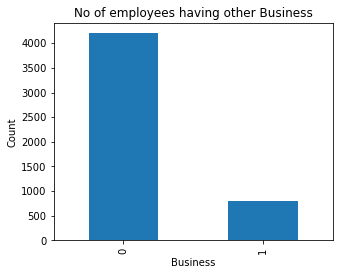

In [17]:
df['Business'].value_counts().plot(kind='bar',
                                    figsize=(5,4),
                                    title="No of employees having other Business")
plt.xlabel("Business")
plt.ylabel("Count")

Zero represents the employee does not have business and one represent employees have other business.This graph shows few employees are having other businesses. 

In [18]:
df['Dependancies'].value_counts()

No     3524
Yes    1476
Name: Dependancies, dtype: int64

Text(0, 0.5, 'Count')

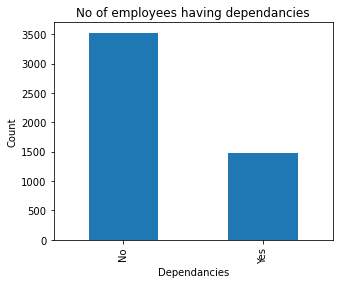

In [19]:
 df['Dependancies'].value_counts().plot(kind='bar',
                                    figsize=(5,4),
                                    title="No of employees having dependancies")
plt.xlabel("Dependancies")
plt.ylabel("Count")

The above plot shows that there are dependancies for 1476 employees are having dependancies.

In [20]:
df['Calls'].value_counts()

Yes    4539
No      461
Name: Calls, dtype: int64

Text(0, 0.5, 'Count')

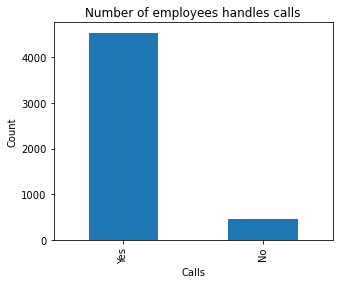

In [21]:
df['Calls'].value_counts().plot(kind='bar',
                                    figsize=(5,4),
                                    title="Number of employees handles calls")
plt.xlabel("Calls")
plt.ylabel("Count")

Above plot shows employees who handles calls are more compare to others.

In [22]:
df['Education'].value_counts()

PG                     2979
Graduation             1980
Intermediate             27
High School or less      14
Name: Education, dtype: int64

Text(0, 0.5, 'No of employees')

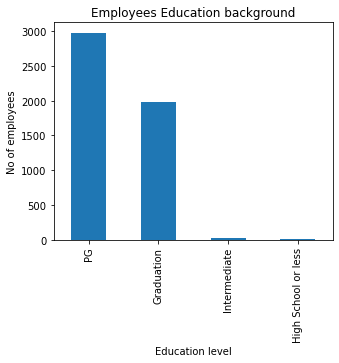

In [23]:
df['Education'].value_counts().plot(kind='bar',
                                    figsize=(5,4),
                                    title="Employees Education background")
plt.xlabel("Education level")
plt.ylabel("No of employees")

The above plot shows that employees who are having higher education are hired more in the company.

In [24]:
df['Type'].unique()

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

# Comparing variables w.r.t Salary

Text(0.5, 1.0, 'Salaries w.r.t Gender')

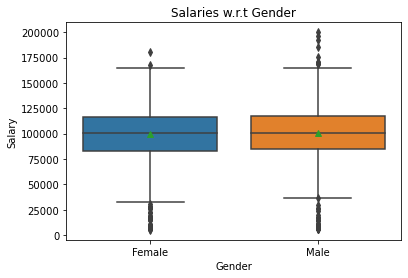

In [25]:
#Average Salary according to Gender
sns.boxplot(x = df['Gender'],
            y = df['Salary'],showmeans=True).set_title('Salaries w.r.t Gender')


Average salary of Male and female does not differ much.

Text(0.5, 1.0, 'Salaries w.r.t Education')

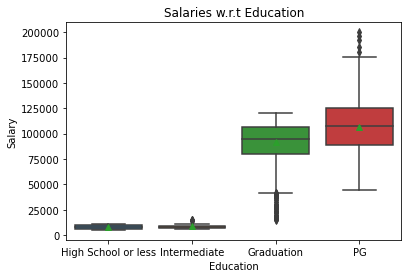

In [26]:
#Average Salary according to Education
sns.boxplot(x = df['Education'],
            y = df['Salary'],showmeans=True).set_title('Salaries w.r.t Education')


Education has high impact on Salary where we can see Post Graduates are highly paid and High school educated are least paid.

Text(0.5, 1.0, 'Salaries w.r.t Calls')

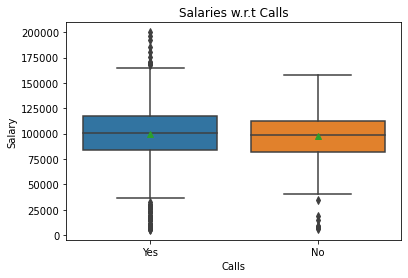

In [27]:
#Average Salary according to Calls
sns.boxplot(x = df['Calls'],
            y = df['Salary'],showmeans=True).set_title('Salaries w.r.t Calls')

There is not much difference in salaries of people who make calls and who doesnot

Text(0.5, 1.0, 'Salaries w.r.t Type')

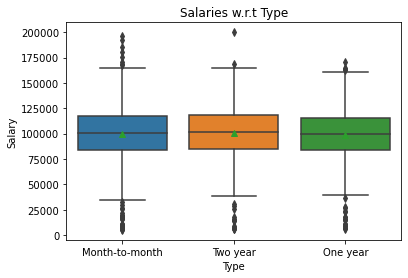

In [28]:
#Average Salary according to Type
sns.boxplot(x = df['Type'],
            y = df['Salary'],showmeans=True).set_title('Salaries w.r.t Type')

There is not much difference in salary w.r.t Type of Salary  settlement 

Text(0.5, 1.0, 'Salaries w.r.t Rating')

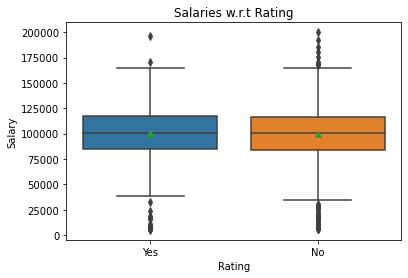

In [29]:
#Average Salary according to Rating
sns.boxplot(x = df['Rating'],
            y = df['Salary'],showmeans=True).set_title('Salaries w.r.t Rating')

There is no difference in Salary w.r.t Rating

Text(0.5, 1.0, 'Salaries w.r.t Business')

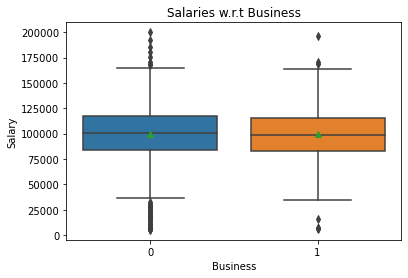

In [30]:
#Average Salary according to Business
sns.boxplot(x = df['Business'],
            y = df['Salary'],showmeans=True).set_title('Salaries w.r.t Business')

There is no difference in Salary w.r.t Business

Text(0.5, 1.0, 'Salaries w.r.t Dependancies')

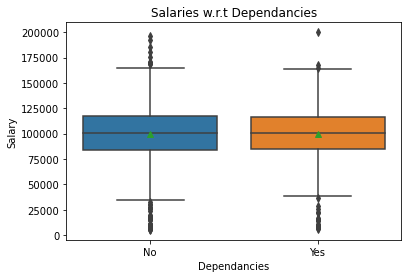

In [31]:
#Average Salary according to Dependancies
sns.boxplot(x = df['Dependancies'],
            y = df['Salary'],showmeans=True).set_title('Salaries w.r.t Dependancies')

There is no difference in Salary w.r.t Dependancies

Text(0.5, 1.0, 'Salaries w.r.t Billing')

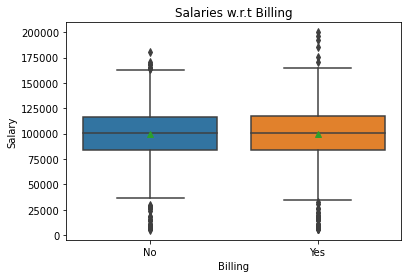

In [32]:
#Average Salary according to Billing
sns.boxplot(x = df['Billing'],
            y = df['Salary'],showmeans=True).set_title('Salaries w.r.t Billing')

There is no difference in Salary w.r.t Billing

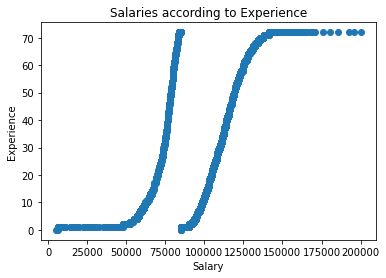

In [33]:
plt.scatter(df['Salary'], df['Months'])
plt.xlabel('Salary')
plt.ylabel('Experience')
plt.title('Salaries according to Experience')
plt.show()

The above plot shows there is positive correlation between Salary and Experience, but we can observe here that there are two categories of employees, who are paid max of around 200000 and employees who are paid below 80000.

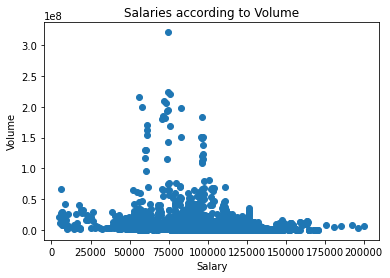

In [34]:
plt.scatter(df['Salary'], df['Volume'])
plt.xlabel('Salary')
plt.ylabel('Volume')
plt.title('Salaries according to Volume')
plt.show()

There is no linear correlation, but we can see most of volume w.r.t Salaries are plotted in a range of 0 to 0.5.

In [35]:
#converiting Total_sales object type to numerical type
df['Total_Sales']=pd.to_numeric(df['Total_Sales'],errors = 'coerce')

The above plot says Salary and Volume has slight negative correlation.

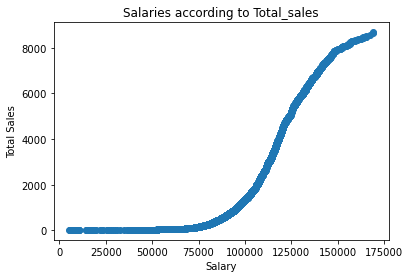

In [36]:
plt.scatter(df['Salary'], df['Total_Sales'])
plt.xlabel('Salary')
plt.ylabel('Total Sales')
plt.title('Salaries according to Total_sales')
plt.show()

Positive correlation between Salary and Total Sales, hence we can say that Total sales are highly dependent on Salaries

As we can observe from visualization that categories of  Age, Business,Dependancies,Billing,Gender,Type,Calls,Rating does not effect on Salary. The only categorical variable Education has an high impact on Salary. Also we can observe Total Sales, Months has positive correlation with Salary.

# Data cleaning 

In [37]:
#dropping duplicated rows 
df=df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False) #keep first keeps the first row and removes other duplicates.

In [38]:
df=df.drop(['openingbalance'], axis = 1)

As we have observed that opening balance has 29% of missing values. Also Clossing balance mean,min,max are equal. I have decided to drop the variable.

In [39]:
df['Education'].value_counts()

PG                     2979
Graduation             1980
Intermediate             27
High School or less      14
Name: Education, dtype: int64

Seperating between Post graduate, graduate, Intermediate, Highschool or less will be less relevant for this study as there are less values in High school and Intermediate. We are combining those two categories to Graduation as it would make more sense.

In [40]:
df['Education']= df['Education'].replace({'Intermediate':'Graduation','High School or less':'Graduation'})

In [41]:
#df1['Education']= df1['Education'].map({'High School or less':'Graduation','Intermediate':'Graduation'})

In [42]:
#one hot encoding
#df=pd.get_dummies(df, columns = ['Education'])

One hot encoding to Education variable where categories of Education are converted to numerical type.

In [43]:
df.head() #after one hot encoding

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.77,21226600,3.76,3.65,18.25,18.80,0,Graduation
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.74,10462800,3.68,3.65,18.40,18.85,0,Graduation
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.89,18761000,4.29,3.72,18.70,18.90,0,Graduation
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.35,66130600,4.31,3.83,18.75,19.00,0,Graduation
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.34,26868200,4.41,4.08,18.80,19.05,1,Graduation


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        4977 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  closingbalance  5000 non-null   float64
 14  low             5000 non-null   float64
 15  Unit_Sales      5000 non-null   float64
 16  Total_Sales     4984 non-null   float64
 17  Months          5000 non-null   i

# Imputing Missing values

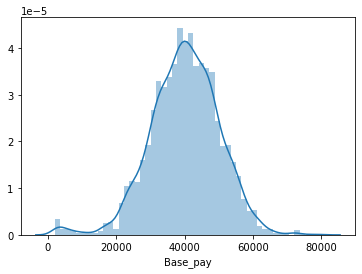

In [45]:
#checking with distribution to impute missing values
sns.distplot(df['Base_pay'])

In [46]:
#imputing Null values with mean for Base_pay
df['Base_pay']=df['Base_pay'].fillna(df['Base_pay'].mean())

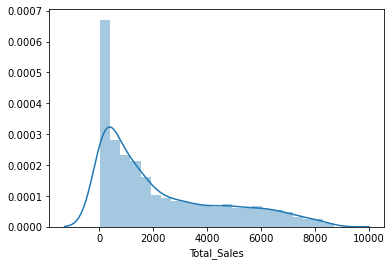

In [47]:
##cecking with distribution to impute missing values
sns.distplot(df['Total_Sales'])


In [48]:
#imputing Null values with median for Total_Sales
df['Total_Sales']=df['Total_Sales'].fillna(df['Total_Sales'].median())

Since the distribution of Base pay is approximately normal I have imputed with mean and Total_sales are right skewed I have imputed it with median.

In [49]:
df.isnull().sum() #Validation

Gender            0
Business          0
Dependancies      0
Calls             0
Type              0
Billing           0
Rating            0
Age               0
Salary            0
Base_pay          0
Bonus             0
Unit_Price        0
Volume            0
closingbalance    0
low               0
Unit_Sales        0
Total_Sales       0
Months            0
Education         0
dtype: int64

# Outliers detection and treatment 

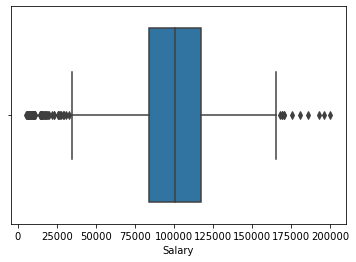

In [50]:
#boxplot for Salary
sns.boxplot(df['Salary'])


Boxplot shows there are many outliers in Salary

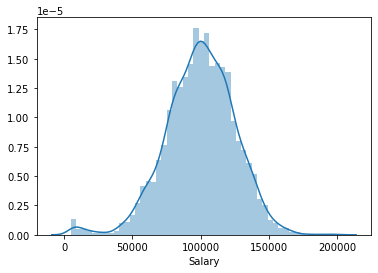

In [51]:
sns.distplot(df['Salary'])


Distribution of Salary looks normal 

In [52]:
print(df['Salary'].skew())


-0.3960415999978834


Since the Skewness is close to 0 , we can say the Salary variable is normally distributed.




Now Since the outliers are more and I don't want to loose the data unless it is extreme outlier. I have used Flooring and capping method where IQR above 90% and IQR below 10% are considered as outliers.

Quantile-based Flooring and Capping

In this technique, we will do the flooring (e.g., the 10th percentile) for the lower values and capping (e.g., the 90th percentile) for the higher values. The lines of code below print the 10th and 90th percentiles of the variable 'Income', respectively. These values will be used for quantile-based flooring and capping.

In [53]:
#Quantile-based Flooring and Capping
print(df['Salary'].quantile(0.10))
print(df['Salary'].quantile(0.90))

68550.37362
131232.04457


In [54]:
df["Salary"] = np.where(df["Salary"] <df['Salary'].quantile(0.10), df['Salary'].quantile(0.10),df['Salary'])
df["Salary"] = np.where(df["Salary"] >df['Salary'].quantile(0.90), df['Salary'].quantile(0.90),df['Salary'])
print(df['Salary'].skew())

-0.0433299040082212





We can now see in the below plot that there are no outliers.

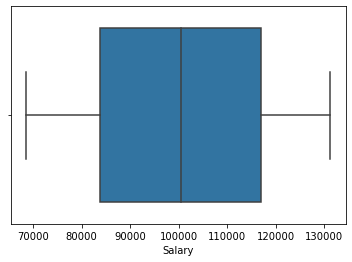

In [55]:
sns.boxplot(df['Salary'])


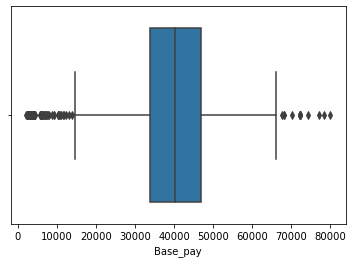

In [56]:
#boxplot for Base_pay
sns.boxplot(df['Base_pay'])

Boxplot shows there are many outliers in Base_pay

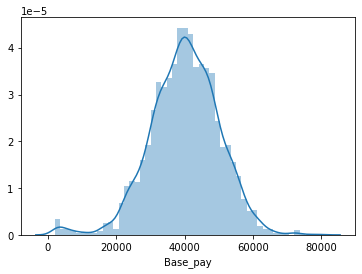

In [57]:
sns.distplot(df['Base_pay'])


In [58]:
print(df['Base_pay'].skew())


-0.3650348409836631


Distribution of Base_pay looks normal from distribution plot.Since the Skewness is close to 0 , we can say the Base_pay variable is normally distributed.

Now Since the outliers are more and I don't want to loose the data unless it is extreme outlier. I have used Flooring and capping method where IQR above 90% and IQR below 10% are considered as outliers.

In [59]:
#Quantile-based Flooring and Capping
print(df['Base_pay'].quantile(0.10))
print(df['Base_pay'].quantile(0.90))

27657.468574000002
52628.605344


In [60]:
df["Base_pay"] = np.where(df["Base_pay"] <df['Base_pay'].quantile(0.10), df['Base_pay'].quantile(0.10),df['Base_pay'])
df["Base_pay"] = np.where(df["Base_pay"] >df['Base_pay'].quantile(0.90), df['Base_pay'].quantile(0.90),df['Base_pay'])
print(df['Base_pay'].skew())

-0.025237709110598056


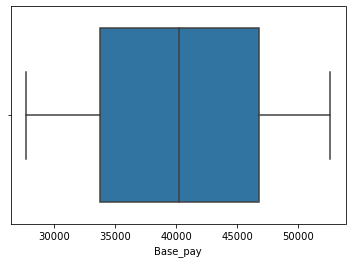

In [61]:
#after flooring and capping
sns.boxplot(df['Base_pay'])

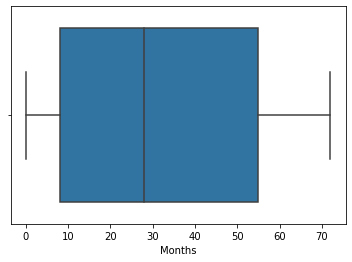

In [62]:
#boxplot for months
sns.boxplot(df['Months'])


Months does not have outliers,but slightly right skewed

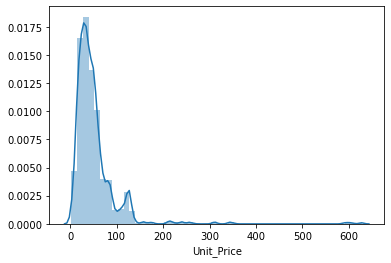

In [63]:
sns.distplot(df['Unit_Price'])

Unit Price is  right skewed. By applying log transformation to the Unit Price we can convert it into normal distribution.

In [64]:
#Converted into normal distribution
df['Unit_Price']=np.log(df['Unit_Price'])

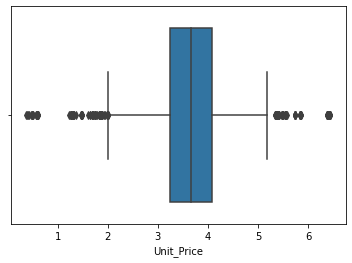

In [65]:
sns.boxplot(df['Unit_Price'])


In [66]:
#Quantile-based Flooring and Capping
print(df['Unit_Price'].quantile(0.10))
print(df['Unit_Price'].quantile(0.90))

2.811027673277442
4.51881675901575


In [67]:
df["Unit_Price"] = np.where(df["Unit_Price"] <df['Unit_Price'].quantile(0.10),df['Unit_Price'].quantile(0.10),df['Unit_Price'])
df["Unit_Price"] = np.where(df["Unit_Price"] >df['Unit_Price'].quantile(0.90),df['Unit_Price'].quantile(0.90),df['Unit_Price'])
print(df['Unit_Price'].skew())

-0.03226335122460818


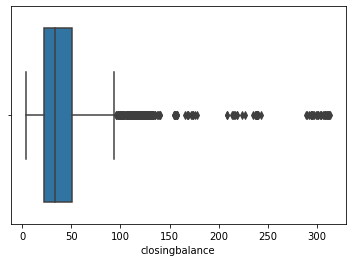

In [68]:
sns.boxplot(df['closingbalance'])


In [69]:
df['closingbalance']=np.log(df['closingbalance'])

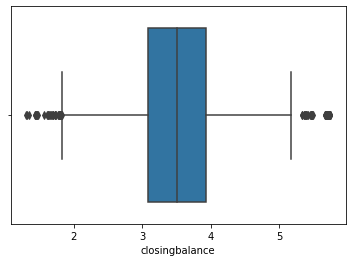

In [70]:
sns.boxplot(df['closingbalance'])


Now Since the outliers are more and I don't want to loose the data unless it is extreme outlier. I have used Flooring and capping method where IQR above 90% and IQR below 10% are considered as outliers.

In [71]:
#Quantile-based Flooring and Capping
print(df['closingbalance'].quantile(0.10))
print(df['closingbalance'].quantile(0.90))

2.6669848551668847
4.409921448980865


In [72]:
df["closingbalance"] = np.where(df["closingbalance"] <df['closingbalance'].quantile(0.10),df['closingbalance'].quantile(0.10),df['closingbalance'])
df["closingbalance"] = np.where(df["closingbalance"] >df['closingbalance'].quantile(0.90), df['closingbalance'].quantile(0.90),df['closingbalance'])
print(df['closingbalance'].skew())

0.052027911907282946


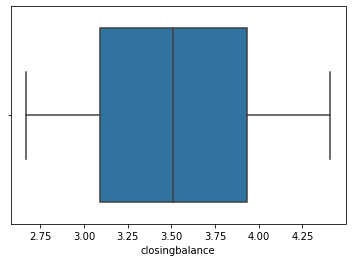

In [73]:
#after flooring and capping
sns.boxplot(df['closingbalance'])


Now closing balance is normally distributed and does not have outliers

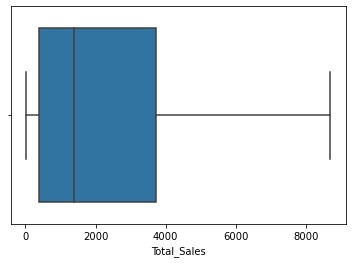

In [74]:
#Total Sales boxplot
sns.boxplot(df['Total_Sales'])


In [75]:
#log transformation
df['Total_Sales']=np.log(df['Total_Sales'])

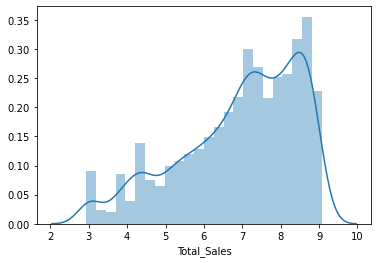

In [76]:
sns.distplot(df['Total_Sales'])


The above plot after log transformation still looks left skewed

In [77]:
df['Unit_Sales']=np.log(df['Unit_Sales'])

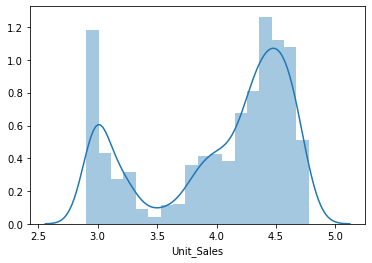

In [78]:
sns.distplot(df['Unit_Sales'])


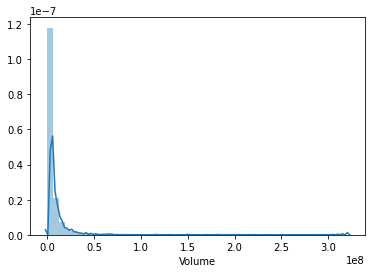

In [79]:
sns.distplot(df['Volume'])


In [80]:
Numeric_col=df.iloc[:,7:18]   #numerical columns
cat_col= df.iloc[:,0:7]       #categorical columns

# Bartlett’s Test of Homogeneity of Variances

Bartlett's test for homogeneity of variances is used to test that variances are equal for all samples. It checks that the assumption of equal variances is true before running certain statistical tests

Bartlett’s test of Homogeneity of Variances is a test,
which allows us to determine whether the variances of a continuous, intervallevel (dependent) variable are equal across two or more groupings of the data by
a categorical (independent) variable.

Null Hypothesis :There is equal variances for all samples.

Alternative Hypothesis: There is a difference in variances of all samples

In [81]:
from scipy.stats import bartlett

# subsetting the data:
Male = df.query('Gender == "Male"')['Salary']
Female = df.query('Gender == "Female"')['Salary']

# Bartlett's test in Python with SciPy:
stat, p = bartlett(Male,Female)

# Get the results:
print(stat, p)


0.8860453288103981 0.3465512410550535


 we accept the null hypothesis as p value >0.05 and can, therefore, assume that the groups have equal variances. 

In [82]:

# subsetting the data:
No = df.query('Business == "0"')['Salary']
Yes = df.query('Business == "1"')['Salary']

# Bartlett's test in Python with SciPy:
stat, p = bartlett(No,Yes)

# Get the results:
print(stat, p)

0.1587047786732841 0.6903518055253657


 we cannot reject the null hypothesis as p value >0.05 and can, therefore, assume that the groups have equal variances. 

In [83]:

# subsetting the data:
No = df.query('Dependancies == "No"')['Salary']
Yes = df.query('Dependancies == "Yes"')['Salary']

# Bartlett's test in Python with SciPy:
stat, p = bartlett(No,Yes)

# Get the results:
print(stat, p)

0.08897018211304104 0.7654904606996155


 we cannot reject the null hypothesis as p value >0.05 and can, therefore, assume that the groups have equal variances. 

In [84]:

# subsetting the data:
No = df.query('Calls == "No"')['Salary']
Yes = df.query('Calls == "Yes"')['Salary']

# Bartlett's test in Python with SciPy:
stat, p = bartlett(No,Yes)

# Get the results:
print(stat, p)

0.3138500676214659 0.5753271837977065


 we cannot reject the null hypothesis as p value >0.05 and can, therefore, assume that the groups have equal variances. 

In [85]:

# subsetting the data:
MTM = df.query('Type == "Month-to-month"')['Salary']
TY = df.query('Type == "Two year"')['Salary']
OY = df.query('Type == "One year"')['Salary']

# Bartlett's test in Python with SciPy:
stat, p = bartlett(MTM,TY,OY)

# Get the results:
print(stat, p)

1.9109872595069006 0.3846222367048766


 we cannot reject the null hypothesis as p value >0.05 and can, therefore, assume that the groups have equal variances. 

In [86]:

# subsetting the data:
No = df.query('Billing == "No"')['Salary']
Yes = df.query('Billing == "Yes"')['Salary']

# Bartlett's test in Python with SciPy:
stat, p = bartlett(No,Yes)

# Get the results:
print(stat, p)

1.3237751774557593 0.24991564662808752


 we cannot reject the null hypothesis as p value >0.05 and can, therefore, assume that the groups have equal variances. 

In [87]:

# subsetting the data:
No = df.query('Rating == "No"')['Salary']
Yes = df.query('Rating == "Yes"')['Salary']

# Bartlett's test in Python with SciPy:
stat, p = bartlett(No,Yes)

# Get the results:
print(stat, p)

0.0030645556723275036 0.9558529137961447


In [88]:

# subsetting the data:
PG= df.query('Education == "PG"')['Salary']
Graduation = df.query('Education == "Graduation"')['Salary']

# Bartlett's test in Python with SciPy:
stat, p = bartlett(PG,Graduation)

# Get the results:
print(stat, p)

148.52153501360772 3.648609113776498e-34


 we cannot reject the null hypothesis as p value >0.05 and can, therefore, assume that the groups have equal variances. 

From Bartlett’s Test of Homogeneity of Variances we observe all the categorical variables are having equal variance in their samples. 

By looking at Box plots of categorical variables(except Education), though we have outliers we assume the variables are normally distributed as the mean and median are equal.

Since Education does not follow normal distribution we cannot do t-test or Annova test.

# T-test

The indepentent T-test is a parametric test used to test for a statistically significant difference in the means between 2 groups.


Assumptions:

*Scale of measurement applied to the data collected follows a continuous.

*simple random sample.

*when plotted, results in a normal distribution.

*large sample size is used.

*homogeneity of variance.


As Our data meets with all the assumptions I have done T-test

Null Hypothesis : The variable does not have an imapct on Salary.

Alternative Hypothesis: There is a impact on Salary

In [89]:
from scipy import stats

Male = df.query('Gender == "Male"')['Salary']
Female = df.query('Gender == "Female"')['Salary']
stats.ttest_ind(Male,Female,equal_var=True)

Ttest_indResult(statistic=1.366662873873131, pvalue=0.17179247323476451)

In [90]:
#Business
No = df.query('Business == "0"')['Salary']
Yes = df.query('Business == "1"')['Salary']
stats.ttest_ind(No,Yes,equal_var=True)

Ttest_indResult(statistic=1.3828274384053931, pvalue=0.16677955988361923)

In [91]:
No = df.query('Dependancies == "No"')['Salary']
Yes = df.query('Dependancies == "Yes"')['Salary']
stats.ttest_ind(No,Yes,equal_var=True)

Ttest_indResult(statistic=-0.35235324641454563, pvalue=0.7245882168572502)

In [92]:
No = df.query('Calls == "No"')['Salary']
Yes = df.query('Calls == "Yes"')['Salary']
stats.ttest_ind(No,Yes,equal_var=True)

Ttest_indResult(statistic=-2.1930579258234846, pvalue=0.028349124923493483)

In [93]:
No = df.query('Billing == "No"')['Salary']
Yes = df.query('Billing == "Yes"')['Salary']
stats.ttest_ind(No,Yes,equal_var=True)

Ttest_indResult(statistic=-0.5971844740812096, pvalue=0.5504112757368369)

In [94]:
No = df.query('Rating == "No"')['Salary']
Yes = df.query('Rating == "Yes"')['Salary']
stats.ttest_ind(No,Yes,equal_var=True)

Ttest_indResult(statistic=-0.751536339717643, pvalue=0.4523653251611175)

From the above t test:
we cannot reject the null hypothesis as p value >0.05 and can, therefore, assume that the Gender,Business,Dependancies,Billing, Rating has no impact on Salary.

And since calls has p value < 0.05 we reject null hypothesis. And So, we can say Calls has impact on Salary


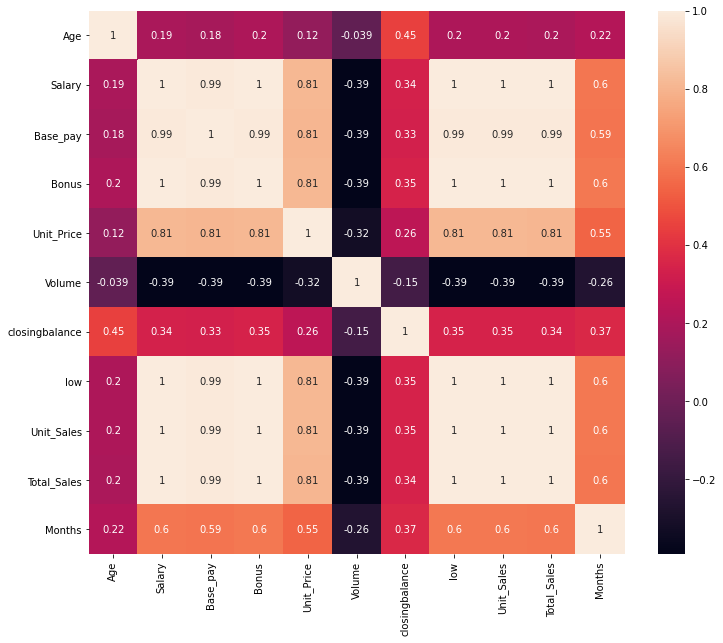

In [95]:
plt.figure(figsize=(12,10))
sns.heatmap(Numeric_col.corr(method='spearman'),annot=True)
  
# displaying the plotted heatmap
plt.show()

Since our data have a non-Gaussian distribution. And Spearman Rank correlation works good with both linear and non linear data, I have preffered this. 
Salary has high postive correlation with Basepay,bonus,Total sales,unit sales ,low.  and Negative correlation with Volume.
There might me multicollinearity in data.

From the above T-test and from visualization of boxplot w.r.t Salary We can observe that Business,Dependancies,Billing,Gender,Calls,Rating does not have an impact on Salary. So removing these variables from the data

In [96]:

df=df.drop(['Business','Dependancies','Billing','Gender','Type','Rating'], axis = 1)


In [97]:
#one hot encoding
df=pd.get_dummies(df, columns = ['Education'])
df=pd.get_dummies(df,columns=['Calls'])

In [98]:
df.head()

,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,closingbalance,low,Unit_Sales,Total_Sales,Months,Education_Graduation,Education_PG,Calls_No,Calls_Yes
0,18,68550.37362,27657.468574,254.4500,2.811028,21226600,2.666985,3.65,2.904165,2.933857,0,1,0,0,1
1,19,68550.37362,27657.468574,284.9060,2.811028,10462800,2.666985,3.65,2.912351,2.936513,0,1,0,0,1
2,22,68550.37362,27657.468574,294.8325,2.811028,18761000,2.666985,3.72,2.928524,2.939162,0,1,0,0,1
3,21,68550.37362,27657.468574,306.2560,2.811028,66130600,2.666985,3.83,2.931194,2.944439,0,1,0,0,1
4,23,68550.37362,27657.468574,312.2500,2.811028,26868200,2.666985,4.08,2.933857,2.947067,1,1,0,0,1


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Salary                5000 non-null   float64
 2   Base_pay              5000 non-null   float64
 3   Bonus                 5000 non-null   float64
 4   Unit_Price            5000 non-null   float64
 5   Volume                5000 non-null   int64  
 6   closingbalance        5000 non-null   float64
 7   low                   5000 non-null   float64
 8   Unit_Sales            5000 non-null   float64
 9   Total_Sales           5000 non-null   float64
 10  Months                5000 non-null   int64  
 11  Education_Graduation  5000 non-null   uint8  
 12  Education_PG          5000 non-null   uint8  
 13  Calls_No              5000 non-null   uint8  
 14  Calls_Yes             5000 non-null   uint8  
dtypes: float64(8), int64(

After cleaning we do not see missing values and also all the variables are converted to numerical.

# Selecting dependent (y) and independent (X) variables

In [100]:
X=df.loc[:, df.columns != 'Salary']
y=df['Salary']

In [101]:
X.head()

,Age,Base_pay,Bonus,Unit_Price,Volume,closingbalance,low,Unit_Sales,Total_Sales,Months,Education_Graduation,Education_PG,Calls_No,Calls_Yes
0,18,27657.468574,254.4500,2.811028,21226600,2.666985,3.65,2.904165,2.933857,0,1,0,0,1
1,19,27657.468574,284.9060,2.811028,10462800,2.666985,3.65,2.912351,2.936513,0,1,0,0,1
2,22,27657.468574,294.8325,2.811028,18761000,2.666985,3.72,2.928524,2.939162,0,1,0,0,1
3,21,27657.468574,306.2560,2.811028,66130600,2.666985,3.83,2.931194,2.944439,0,1,0,0,1
4,23,27657.468574,312.2500,2.811028,26868200,2.666985,4.08,2.933857,2.947067,1,1,0,0,1


# Multicollinearity

Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.

Multicollinearity causes the following two basic types of problems:

The coefficient estimates can swing wildly based on which other independent variables are in the model. The coefficients become very sensitive to small changes in the model.
Multicollinearity reduces the precision of the estimated coefficients, which weakens the statistical power of your regression model.

In [102]:
Mc_X=df[df.columns.difference(['Calls_No','Calls_Yes', 'Education_Graduation','Education_PG','Salary'])]


In [103]:
Mc_X.head()

,Age,Base_pay,Bonus,Months,Total_Sales,Unit_Price,Unit_Sales,Volume,closingbalance,low
0,18,27657.468574,254.4500,0,2.933857,2.811028,2.904165,21226600,2.666985,3.65
1,19,27657.468574,284.9060,0,2.936513,2.811028,2.912351,10462800,2.666985,3.65
2,22,27657.468574,294.8325,0,2.939162,2.811028,2.928524,18761000,2.666985,3.72
3,21,27657.468574,306.2560,0,2.944439,2.811028,2.931194,66130600,2.666985,3.83
4,23,27657.468574,312.2500,1,2.947067,2.811028,2.933857,26868200,2.666985,4.08


In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = Mc_X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(Mc_X.values, i)
                          for i in range(len(Mc_X.columns))]
  
print(vif_data)

          feature          VIF
0             Age    45.082845
1        Base_pay   704.662597
2           Bonus   577.554795
3          Months     9.326319
4     Total_Sales   828.088133
5      Unit_Price   134.786418
6      Unit_Sales  1114.455904
7          Volume     1.217816
8  closingbalance    52.181366
9             low    11.857493


In [105]:
Mc_X=Mc_X.drop(['Unit_Sales'],axis=1)

In [106]:
Mc_X=Mc_X.drop(['Total_Sales'],axis=1)

In [107]:
Mc_X=Mc_X.drop(['Base_pay'],axis=1)

In [108]:
Mc_X=Mc_X.drop(['Bonus'],axis=1)

In [109]:
Mc_X=Mc_X.drop(['closingbalance'],axis=1)

In [110]:
Mc_X=Mc_X.drop(['Unit_Price'],axis=1)

We are not looking into Education and Class here as it is Categorical.

In [111]:
X=X.drop(['Bonus','Unit_Price','Unit_Sales','Base_pay','Total_Sales','closingbalance'], axis = 1)

Dropped the variable with multicollinearity

In [112]:
#data after dropping variables
X.head()

,Age,Volume,low,Months,Education_Graduation,Education_PG,Calls_No,Calls_Yes
0,18,21226600,3.65,0,1,0,0,1
1,19,10462800,3.65,0,1,0,0,1
2,22,18761000,3.72,0,1,0,0,1
3,21,66130600,3.83,0,1,0,0,1
4,23,26868200,4.08,1,1,0,0,1


# Splitting data into train and test

The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

In [113]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

# Standardization

Standardization ensures that the end product has consistent quality and that any conclusions made are comparable with all other equivalent variables in the same data.

In [114]:
#scaling_data=['Unit_Price','Volume','low','Months','Age','closingbalance']

In [115]:
scaling_data=['Volume','low','Months','Age']

In [116]:
#importing library StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train[scaling_data]=scaler.fit_transform(X_train[scaling_data])
X_test[scaling_data]=scaler.fit_transform(X_test[scaling_data])

<ipython-input-116-6bc30c46421c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[scaling_data]=scaler.fit_transform(X_train[scaling_data])
C:\Users\chinna\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-116-6bc30c46421c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [117]:
X_train.head()

,Age,Volume,low,Months,Education_Graduation,Education_PG,Calls_No,Calls_Yes
4227,1.186523,-0.088146,0.528571,1.087494,0,1,0,1
4676,0.249925,-0.387887,1.832013,1.533724,0,1,0,1
800,0.484075,-0.258548,-0.708989,0.357299,1,0,0,1
3671,0.718224,-0.136628,0.176193,0.438431,1,0,0,1
4193,0.835299,-0.326799,0.507363,1.046927,0,1,0,1


In [142]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 4227 to 860
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   4000 non-null   float64
 1   Volume                4000 non-null   float64
 2   low                   4000 non-null   float64
 3   Months                4000 non-null   float64
 4   Education_Graduation  4000 non-null   uint8  
 5   Education_PG          4000 non-null   uint8  
 6   Calls_No              4000 non-null   uint8  
 7   Calls_Yes             4000 non-null   uint8  
dtypes: float64(4), uint8(4)
memory usage: 171.9 KB


# Model Building

# Linear Regression

Multiple linear regression attempts to model the relationship between two or more explanatory variables and a response variable by fitting a linear equation to observed data. Every value of the independent variable x is associated with a value of the dependent variable y

In [143]:

from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model=lm.fit(X_train,y_train)

#prediction
y_predLR=model.predict(X_test)

In [144]:
from sklearn.metrics import r2_score

r2_score(y_test,y_predLR)

0.6296379048771725

62% percent of Variance of dependent variable explained by the varirance of independent variables 

The adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases only if the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected by chance. The adjusted R-squared can be negative, but it’s usually not.  It is always lower than the R-squared.

In [145]:
#Adjusted r score
r2=r2_score(y_test,y_predLR)
n = len(y_predLR)
p = X_test.shape[1]
adj_r = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
adj_r

0.6266480998711356

In [146]:
inference_df = pd.DataFrame({"Actual": y_test,
                             "Predictions": y_predLR,
                             "Abs Error": np.abs(y_test-y_predLR)})

inference_df

,Actual,Predictions,Abs Error
1501,87840.04783,88815.164683,975.116853
2586,101696.94250,93006.042458,8690.900042
2653,102526.10000,96197.495287,6328.604713
1055,80952.27759,95030.790965,14078.513375
705,74646.47280,90998.154862,16351.682062
...,...,...,...
4711,131232.04457,132340.800155,1108.755585
2313,98455.87126,94229.653751,4226.217509
3214,109603.85170,98845.394240,10758.457460
2732,103369.50500,94714.603779,8654.901221


Assumptions of Linear Regression & Ridge Regression

1. Linear relationship: There exists a linear relationship between the independent variable, x, and the dependent variable, y.

2. Independence: The residuals are independent. In particular, there is no correlation between consecutive residuals in time series data.

3. Homoscedasticity: The residuals have constant variance at every level of x.

4. Normality: The residuals of the model are normally distributed.

Since few variables in the data does not follow Normal distribution. So we do not consider Linear Regression model.

# Ridge Regression

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values. 

In [147]:
from sklearn.linear_model import Ridge
Rid = Ridge(alpha=2.0)
modelR=Rid.fit(X_train, y_train)
y_pred=modelR.predict(X_test)

In [148]:
print("Prediction accuracy: \n r2 score = {:.2f}".format(r2_score(y_test, y_pred)))


Prediction accuracy: 
 r2 score = 0.63


In [149]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6296260579242113

The adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases only if the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected by chance. The adjusted R-squared can be negative, but it’s usually not. It is always lower than the R-squared.

In [150]:
r2=r2_score(y_test,y_pred)
n = len(y_pred)
p = X_test.shape[1]
adj_r = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
adj_r

0.6266361572818235

In [151]:
inference_df = pd.DataFrame({"Actual": y_test,
                             "Predictions": y_pred,
                             "Abs Error": np.abs(y_test-y_pred)})

inference_df

,Actual,Predictions,Abs Error
1501,87840.04783,88813.242782,973.194952
2586,101696.94250,93007.242220,8689.700280
2653,102526.10000,96200.580405,6325.519595
1055,80952.27759,95041.412755,14089.135165
705,74646.47280,91003.684994,16357.212194
...,...,...,...
4711,131232.04457,132329.241102,1097.196532
2313,98455.87126,94231.455028,4224.416232
3214,109603.85170,98837.492234,10766.359466
2732,103369.50500,94716.922281,8652.582719


In [152]:
#cross validation to avoid overfitting
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

scores= cross_val_score(Rid, X_train, y_train, scoring='r2', cv=5)

# report performance
mean(scores)


0.6140385590198347

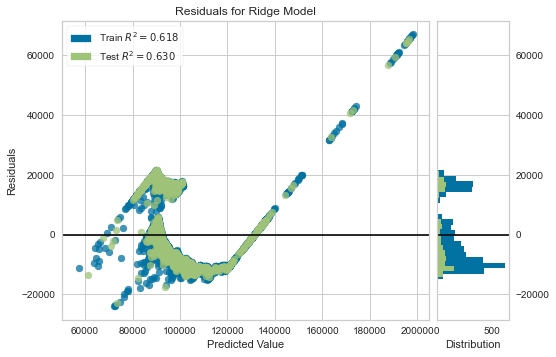

In [153]:
#Residual plot for Ridge regression
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(modelR)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()   

Here the data points are randomly distributed , so our model is good.

# Decision Tree

 Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. 

 

In [169]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressorDT = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressorDT=regressorDT.fit(X_train, y_train)

In [170]:
y_predDT=regressorDT.predict(X_test)

In [171]:
r2_score(y_test,y_predDT)

0.9998799848991639

The adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases only if the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected by chance. The adjusted R-squared can be negative, but it’s usually not. It is always lower than the R-squared.

In [157]:
r2=r2_score(y_test,y_predDT)
n = len(y_predDT)
p = X_test.shape[1]
adj_r = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
adj_r

0.9998790160587938

In [158]:
inference_df = pd.DataFrame({"Actual": y_test,
                             "Predictions": y_predDT,
                             "Abs Error": np.abs(y_test-y_predDT)})

inference_df

,Actual,Predictions,Abs Error
1501,87840.04783,88435.58676,595.53893
2586,101696.94250,101901.48720,204.54470
2653,102526.10000,102627.71650,101.61650
1055,80952.27759,81057.07194,104.79435
705,74646.47280,74502.51541,143.95739
...,...,...,...
4711,131232.04457,131232.04457,0.00000
2313,98455.87126,98588.26752,132.39626
3214,109603.85170,109566.70880,37.14290
2732,103369.50500,103294.17220,75.33280


In [159]:
#crossvalidation to avoid overfitting
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

scores = cross_val_score(regressorDT, X_train, y_train, scoring='r2', cv=5)

# report performance
mean(scores)

0.9999353137166984

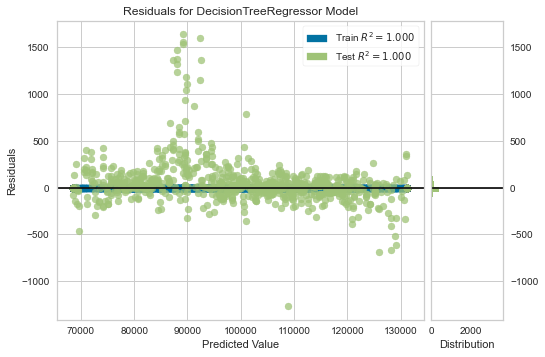

In [160]:
#Residual plot for DecisionTree regression
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(regressorDT)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()   

The above plot shows the above model is overfitted. The overfitting problem is occuring since the data is too small.

# Conclusion

Age,Volume,low,Months,Education,Calls,Bonus,Unit_Price,Unit_Sales,Base_pay,Total_Sales,closingbalance are the factors which depend on Salary. There is positive correlation between Salary and Experience, but we can observe here that there are two categories of employees, who are paid max of around 200000 and employees who are paid below 80000. And Volume is Negatively correlated.

From the above three models we consider Decision Tree Regression model where the data is regularized and residuals are randomly plotted. Also multicollinearity in the data is handled well. 

HR industry can use Decision Tree Regression model which has 99% accuracy to know how salary is varying with respect to other considerable factors. With this model HR industry can predict salary for a new joiners in the company with certain experience  and also give salaries accordingly.

Saying this,if the data was larger the model score would have been better.

# Reference


https://www.pluralsight.com/guides/cleaning-up-data-from-outliers
https://www.statology.org/standardize-data-python/